## Imports & Settings

In [1]:
# Update working directory to parent so that we may use our custom functions
import os
os.chdir('..')
# os.getcwd( )

import pandas as pd
import itertools
import re
from ast import literal_eval

## Load Test Data

In [2]:
# load test data
iSarcasm_df = pd.read_csv('data/target_semEval2022_en/iSarcasmEval-main/test/task_A_En_test.csv')
iSarcasm_df = iSarcasm_df.rename(columns={'tweet': 'text'})
iSarcasm_df = iSarcasm_df.rename(columns={'sarcastic': 'label'})

true_preds = iSarcasm_df['label'].to_list()

## Load Model Results Dataset

In [3]:
results_df = pd.read_csv('results/results_target.csv', converters={'predictions': pd.eval})

results_df.head()

,model_name,model_epoch,test_accuracy,test_f1,predictions
0,iSarcasm_control_01,E01_A0.61_F0.4,0.797143,0.128834,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,iSarcasm_control_01,E02_A0.83_F0.82,0.767143,0.402930,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,iSarcasm_control_01,E03_A0.87_F0.87,0.740000,0.403279,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ..."
3,iSarcasm_control_01,E04_A0.86_F0.87,0.693571,0.370044,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,iSarcasm_control_01,E05_A0.93_F0.93,0.822857,0.403846,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Filter Dataset
Below, we filter the dataset to retrieve only the best models by F1 score.

In [4]:
idx = results_df.groupby(['model_name'])['test_accuracy'].transform(max) == results_df['test_accuracy']

acc_estimators_df = results_df[idx]


patternDel = ".*control.*"
filter = acc_estimators_df['model_name'].str.contains(patternDel)

acc_estimators_df = acc_estimators_df[~filter]
acc_estimators_df

,model_name,model_epoch,test_accuracy,test_f1,predictions
36,target-iSarcasm_inter-XED-binary_01,E07_A0.93_F0.93,0.850714,0.424242,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
43,target-iSarcasm_inter-XED-binary_02,E04_A0.91_F0.9,0.835000,0.426799,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
54,target-iSarcasm_inter-XED-binary_03,E05_A0.91_F0.91,0.795714,0.430279,"[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
66,target-iSarcasm_inter-SARC_01,E07_A0.92_F0.91,0.833571,0.492375,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ..."
74,target-iSarcasm_inter-SARC_02,E05_A0.9_F0.9,0.806429,0.465483,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, ..."
83,target-iSarcasm_inter-SARC_03,E04_A0.9_F0.9,0.802143,0.438134,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, ..."
99,target-iSarcasm_inter-XED-fine_01,E10_A0.94_F0.93,0.828571,0.402985,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
109,target-iSarcasm_inter-XED-fine_02,E10_A0.91_F0.91,0.802143,0.419287,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
119,target-iSarcasm_inter-XED-fine_03,E10_A0.91_F0.91,0.810000,0.357488,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
127,target-iSarcasm_inter-IMDB_01,E08_A0.92_F0.92,0.792857,0.334862,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


## Self-Select Estimators

In [5]:
acc_estimators_df.loc[acc_estimators_df['model_name']=='target-iSarcasm_inter-XED-binary_01', 'predictions'].tolist()[0]

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [6]:
# use all estimators 
# estimators = estimators_df['model_name'].to_list()

# define particular estimators 
estimators = ['target-iSarcasm_inter-XED-binary_01', 'target-iSarcasm_inter-XED-binary_02', 'target-iSarcasm_inter-XED-binary_03','target-iSarcasm_inter-SARC_01', 'target-iSarcasm_inter-SARC_02', 'target-iSarcasm_inter-SARC_03','target-iSarcasm_inter-hellaswag_01', 'target-iSarcasm_inter-hellaswag_02', 'target-iSarcasm_inter-hellaswag_03']

# get predictions of the defined estimators
predictions =  [acc_estimators_df.loc[acc_estimators_df['model_name']==m, 'predictions'].tolist()[0] for m in estimators]

print(estimators)
print(len(predictions))


['target-iSarcasm_inter-XED-binary_01', 'target-iSarcasm_inter-XED-binary_02', 'target-iSarcasm_inter-XED-binary_03', 'target-iSarcasm_inter-SARC_01', 'target-iSarcasm_inter-SARC_02', 'target-iSarcasm_inter-SARC_03', 'target-iSarcasm_inter-hellaswag_01', 'target-iSarcasm_inter-hellaswag_02', 'target-iSarcasm_inter-hellaswag_03']
9


In [7]:
pred_groups = []
for i in range(len(true_preds)):
    pred_stage = []
    for prediction in predictions:
        pred_stage.append(prediction[i])
    pred_groups.append(pred_stage)

# print(pred_groups[0])
# print(pred_groups[1])
# print(pred_groups[2])
# print(pred_groups[3])
# print(pred_groups[4])



In [8]:
for i in range(20):    
    pred_index = i
    the_list = pred_groups[pred_index]
    prediction = max(set(the_list), key=the_list.count)

    if prediction == true_preds[pred_index]:
        print(prediction, true_preds[pred_index])
    else:
        print(prediction, true_preds[pred_index], iSarcasm_df['text'].iloc[i])

0 0
1 0 Pinball!
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1 Sometimes I lay in bed and think about how today will be the day I make my life better. Exercise, drinking water, eating healthy. Then I wake up. 
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [9]:
def most_common(lst):
    return max(set(lst), key=lst.count)

ensemble_preds = []

for i in pred_groups:
    ensemble_preds.append(most_common(i))
# print(ensemble_preds)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

acc = accuracy_score(true_preds, ensemble_preds)
f1 = f1_score(true_preds, ensemble_preds, average='binary')

print(acc)
print(f1)

0.8707142857142857
0.46607669616519176


# Try All Estimator Combinations

In [11]:
estimators = acc_estimators_df['model_name'].to_list()

# estimators = [1, 3, 3]
combinations = []
for r in range(len(estimators)+1):
    for combination in itertools.combinations(set(estimators), r):
        combinations.append(combination)

three_estimators = []
for i in combinations:
    if len(i) == 3: 
        three_estimators.append(i)

print(three_estimators[0])

('target-iSarcasm_inter-IMDB_01', 'target-iSarcasm_inter-XED-binary_02', 'target-iSarcasm_inter-SARC_01')


In [12]:
three_estimators

[('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-SARC_01'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-XED-fine_01'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-XED-fine_03'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-IMDB_02'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-hellaswag_02'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-XED-binary_03'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-IMDB_03'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-hellaswag_01'),
 ('target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-XED-binary_02',
  't

In [13]:
accuracies = []
f1s = []

for i in three_estimators:
    # TODO DOUBLE CHECK THIS SHIT
    predictions = [acc_estimators_df.loc[acc_estimators_df['model_name']==m, 'predictions'].tolist()[0] for m in i]

    pred_groups = []
    for j in range(len(true_preds)):
        pred_stage = []
        for prediction in predictions:
            pred_stage.append(prediction[j])
        pred_groups.append(pred_stage)

    ensemble_preds = []
    for k in pred_groups:
        ensemble_preds.append(most_common(k))
    
    acc = accuracy_score(true_preds, ensemble_preds)
    f1 = f1_score(true_preds, ensemble_preds, average='binary')
    accuracies.append(acc)
    f1s.append(f1)
    # print(acc, f1)

In [14]:
max(accuracies)

0.8735714285714286

In [15]:
max(f1s)

0.5011600928074246

# Structured Model Strategy

In order to get sets of three models, each containing all three top epochs for each model iteration, follow these steps:

In [16]:
# 1. make list of core model names
estimator_names = ['target-iSarcasm_inter-SARC', 
                   'target-iSarcasm_inter-XED-fine', 
                   'target-iSarcasm_inter-XED-binary', 
                   'target-iSarcasm_inter-IMDB', 
                   'target-iSarcasm_inter-hellaswag']

# 2. using above methods, get superset of all unique combinations of 3 (and more?) core model names - itertools.combinations
combinations = []
for r in range(len(estimator_names)+1):
    for combination in itertools.combinations(set(estimator_names), r):
        combinations.append(combination)

three_estimators = []
for i in combinations:
    if len(i) == 3: 
        three_estimators.append(i)

print(three_estimators[0])

('target-iSarcasm_inter-SARC', 'target-iSarcasm_inter-hellaswag', 'target-iSarcasm_inter-IMDB')


In [17]:
len(three_estimators)


10

In [18]:
# 3. we are working from best df, so for each list created in step 2, triplicate each core model name and add _01, _02, _03
# this allows us to query the df for those specific model predictions in unique sets of three, containing all three best iterations of each model
new_three_estimators = []
for i in three_estimators:
    triplets = []
    for j in i:
        triplets.append(j + "_01")
        triplets.append(j + "_02")
        triplets.append(j + "_03")
    new_three_estimators.append(tuple(triplets))

In [19]:
new_three_estimators

[('target-iSarcasm_inter-SARC_01',
  'target-iSarcasm_inter-SARC_02',
  'target-iSarcasm_inter-SARC_03',
  'target-iSarcasm_inter-hellaswag_01',
  'target-iSarcasm_inter-hellaswag_02',
  'target-iSarcasm_inter-hellaswag_03',
  'target-iSarcasm_inter-IMDB_01',
  'target-iSarcasm_inter-IMDB_02',
  'target-iSarcasm_inter-IMDB_03'),
 ('target-iSarcasm_inter-SARC_01',
  'target-iSarcasm_inter-SARC_02',
  'target-iSarcasm_inter-SARC_03',
  'target-iSarcasm_inter-hellaswag_01',
  'target-iSarcasm_inter-hellaswag_02',
  'target-iSarcasm_inter-hellaswag_03',
  'target-iSarcasm_inter-XED-binary_01',
  'target-iSarcasm_inter-XED-binary_02',
  'target-iSarcasm_inter-XED-binary_03'),
 ('target-iSarcasm_inter-SARC_01',
  'target-iSarcasm_inter-SARC_02',
  'target-iSarcasm_inter-SARC_03',
  'target-iSarcasm_inter-hellaswag_01',
  'target-iSarcasm_inter-hellaswag_02',
  'target-iSarcasm_inter-hellaswag_03',
  'target-iSarcasm_inter-XED-fine_01',
  'target-iSarcasm_inter-XED-fine_02',
  'target-iSarcas

In [20]:
# 4. collect sets of predictions via each unique collection, and operate on predictions as above.
accuracies = []
f1s = []

three_estimators

results = {"ensemble_id":[], "inducers": [], "inducers_spec":[], "dataset":[], "accuracies":[], "f1s":[]}
for i, v in enumerate(new_three_estimators):
    predictions = [acc_estimators_df.loc[acc_estimators_df['model_name']==m, 'predictions'].tolist()[0] for m in v]

    pred_groups = []
    
    for j in range(len(true_preds)):
        pred_stage = []
        for prediction in predictions:
            pred_stage.append(prediction[j])
        pred_groups.append(pred_stage)

    ensemble_preds = []
    for k in pred_groups:
        ensemble_preds.append(most_common(k))
    
    acc = accuracy_score(true_preds, ensemble_preds)
    f1 = f1_score(true_preds, ensemble_preds, average='binary')
    
    results["ensemble_id"].append(f"ensemble_{i}")
    results["inducers"].append(three_estimators[i])
    results["inducers_spec"].append(v)
    results["dataset"].append("iSarcasm_test")
    results["accuracies"].append(acc)
    results["f1s"].append(f1)




    accuracies.append(acc)
    f1s.append(f1)
    # print(acc, f1)
    

In [21]:
results_df = pd.DataFrame.from_dict(results)
results_df = results_df.sort_values(by=['accuracies'], ascending=False)

In [22]:
pd.set_option('display.max_colwidth', None)

# TODO NOTE THAT WHILE THE MAX F1 DOES NOT EXCEED PREVIOUS MAX F1, THE AVERAGE CERTAINLY DOES.
# WE SHOULD ONLY COMPARE THIS DATA TO DATA FROM BEST EPOCHS
results_df

,ensemble_id,inducers,inducers_spec,dataset,accuracies,f1s
6,ensemble_6,"(target-iSarcasm_inter-hellaswag, target-iSarcasm_inter-IMDB, target-iSarcasm_inter-XED-binary)","(target-iSarcasm_inter-hellaswag_01, target-iSarcasm_inter-hellaswag_02, target-iSarcasm_inter-hellaswag_03, target-iSarcasm_inter-IMDB_01, target-iSarcasm_inter-IMDB_02, target-iSarcasm_inter-IMDB_03, target-iSarcasm_inter-XED-binary_01, target-iSarcasm_inter-XED-binary_02, target-iSarcasm_inter-XED-binary_03)",iSarcasm_test,0.872857,0.402685
1,ensemble_1,"(target-iSarcasm_inter-SARC, target-iSarcasm_inter-hellaswag, target-iSarcasm_inter-XED-binary)","(target-iSarcasm_inter-SARC_01, target-iSarcasm_inter-SARC_02, target-iSarcasm_inter-SARC_03, target-iSarcasm_inter-hellaswag_01, target-iSarcasm_inter-hellaswag_02, target-iSarcasm_inter-hellaswag_03, target-iSarcasm_inter-XED-binary_01, target-iSarcasm_inter-XED-binary_02, target-iSarcasm_inter-XED-binary_03)",iSarcasm_test,0.870714,0.466077
0,ensemble_0,"(target-iSarcasm_inter-SARC, target-iSarcasm_inter-hellaswag, target-iSarcasm_inter-IMDB)","(target-iSarcasm_inter-SARC_01, target-iSarcasm_inter-SARC_02, target-iSarcasm_inter-SARC_03, target-iSarcasm_inter-hellaswag_01, target-iSarcasm_inter-hellaswag_02, target-iSarcasm_inter-hellaswag_03, target-iSarcasm_inter-IMDB_01, target-iSarcasm_inter-IMDB_02, target-iSarcasm_inter-IMDB_03)",iSarcasm_test,0.869286,0.419048
7,ensemble_7,"(target-iSarcasm_inter-hellaswag, target-iSarcasm_inter-IMDB, target-iSarcasm_inter-XED-fine)","(target-iSarcasm_inter-hellaswag_01, target-iSarcasm_inter-hellaswag_02, target-iSarcasm_inter-hellaswag_03, target-iSarcasm_inter-IMDB_01, target-iSarcasm_inter-IMDB_02, target-iSarcasm_inter-IMDB_03, target-iSarcasm_inter-XED-fine_01, target-iSarcasm_inter-XED-fine_02, target-iSarcasm_inter-XED-fine_03)",iSarcasm_test,0.865000,0.384365
2,ensemble_2,"(target-iSarcasm_inter-SARC, target-iSarcasm_inter-hellaswag, target-iSarcasm_inter-XED-fine)","(target-iSarcasm_inter-SARC_01, target-iSarcasm_inter-SARC_02, target-iSarcasm_inter-SARC_03, target-iSarcasm_inter-hellaswag_01, target-iSarcasm_inter-hellaswag_02, target-iSarcasm_inter-hellaswag_03, target-iSarcasm_inter-XED-fine_01, target-iSarcasm_inter-XED-fine_02, target-iSarcasm_inter-XED-fine_03)",iSarcasm_test,0.863571,0.464986
8,ensemble_8,"(target-iSarcasm_inter-hellaswag, target-iSarcasm_inter-XED-binary, target-iSarcasm_inter-XED-fine)","(target-iSarcasm_inter-hellaswag_01, target-iSarcasm_inter-hellaswag_02, target-iSarcasm_inter-hellaswag_03, target-iSarcasm_inter-XED-binary_01, target-iSarcasm_inter-XED-binary_02, target-iSarcasm_inter-XED-binary_03, target-iSarcasm_inter-XED-fine_01, target-iSarcasm_inter-XED-fine_02, target-iSarcasm_inter-XED-fine_03)",iSarcasm_test,0.863571,0.429851
3,ensemble_3,"(target-iSarcasm_inter-SARC, target-iSarcasm_inter-IMDB, target-iSarcasm_inter-XED-binary)","(target-iSarcasm_inter-SARC_01, target-iSarcasm_inter-SARC_02, target-iSarcasm_inter-SARC_03, target-iSarcasm_inter-IMDB_01, target-iSarcasm_inter-IMDB_02, target-iSarcasm_inter-IMDB_03, target-iSarcasm_inter-XED-binary_01, target-iSarcasm_inter-XED-binary_02, target-iSarcasm_inter-XED-binary_03)",iSarcasm_test,0.860000,0.473118
9,ensemble_9,"(target-iSarcasm_inter-IMDB, target-iSarcasm_inter-XED-binary, target-iSarcasm_inter-XED-fine)","(target-iSarcasm_inter-IMDB_01, target-iSarcasm_inter-IMDB_02, target-iSarcasm_inter-IMDB_03, target-iSarcasm_inter-XED-binary_01, target-iSarcasm_inter-XED-binary_02, target-iSarcasm_inter-XED-binary_03, target-iSarcasm_inter-XED-fine_01, target-iSarcasm_inter-XED-fine_02, target-iSarcasm_inter-XED-fine_03)",iSarcasm_test,0.851429,0.425414
4,ensemble_4,"(target-iSarcasm_inter-SARC, target-iSarcasm_inter-IMDB, target-iSarcasm_inter-XED-fine)","(target-iSarcasm_inter-SARC_01, target-iSarcasm_inter-SARC_02, target-iSarcasm_inter-SARC_03, target-iSarcasm_inter-IMDB_01, target-iSarcasm_inter-IMDB_02, target-iSarcasm_inter-IMDB_03, target-iSarcasm_inter-XED-fine_01

In [23]:
results_df.describe()

,accuracies,f1s
count,10.000000,10.000000
mean,0.861571,0.437602
std,0.008695,0.030137
min,0.849286,0.384365
25%,0.853571,0.420639
50%,0.863571,0.438610
75%,0.868214,0.464516
max,0.872857,0.473118


In [24]:
acc_estimators_df.describe()

,test_accuracy,test_f1
count,15.000000,15.000000
mean,0.820143,0.373584
std,0.022908,0.078850
min,0.792857,0.245353
25%,0.802143,0.318688
50%,0.810000,0.402985
75%,0.839286,0.428539
max,0.855000,0.492375


In [25]:
max(accuracies)

0.8728571428571429

In [26]:
max(f1s)

0.4731182795698925

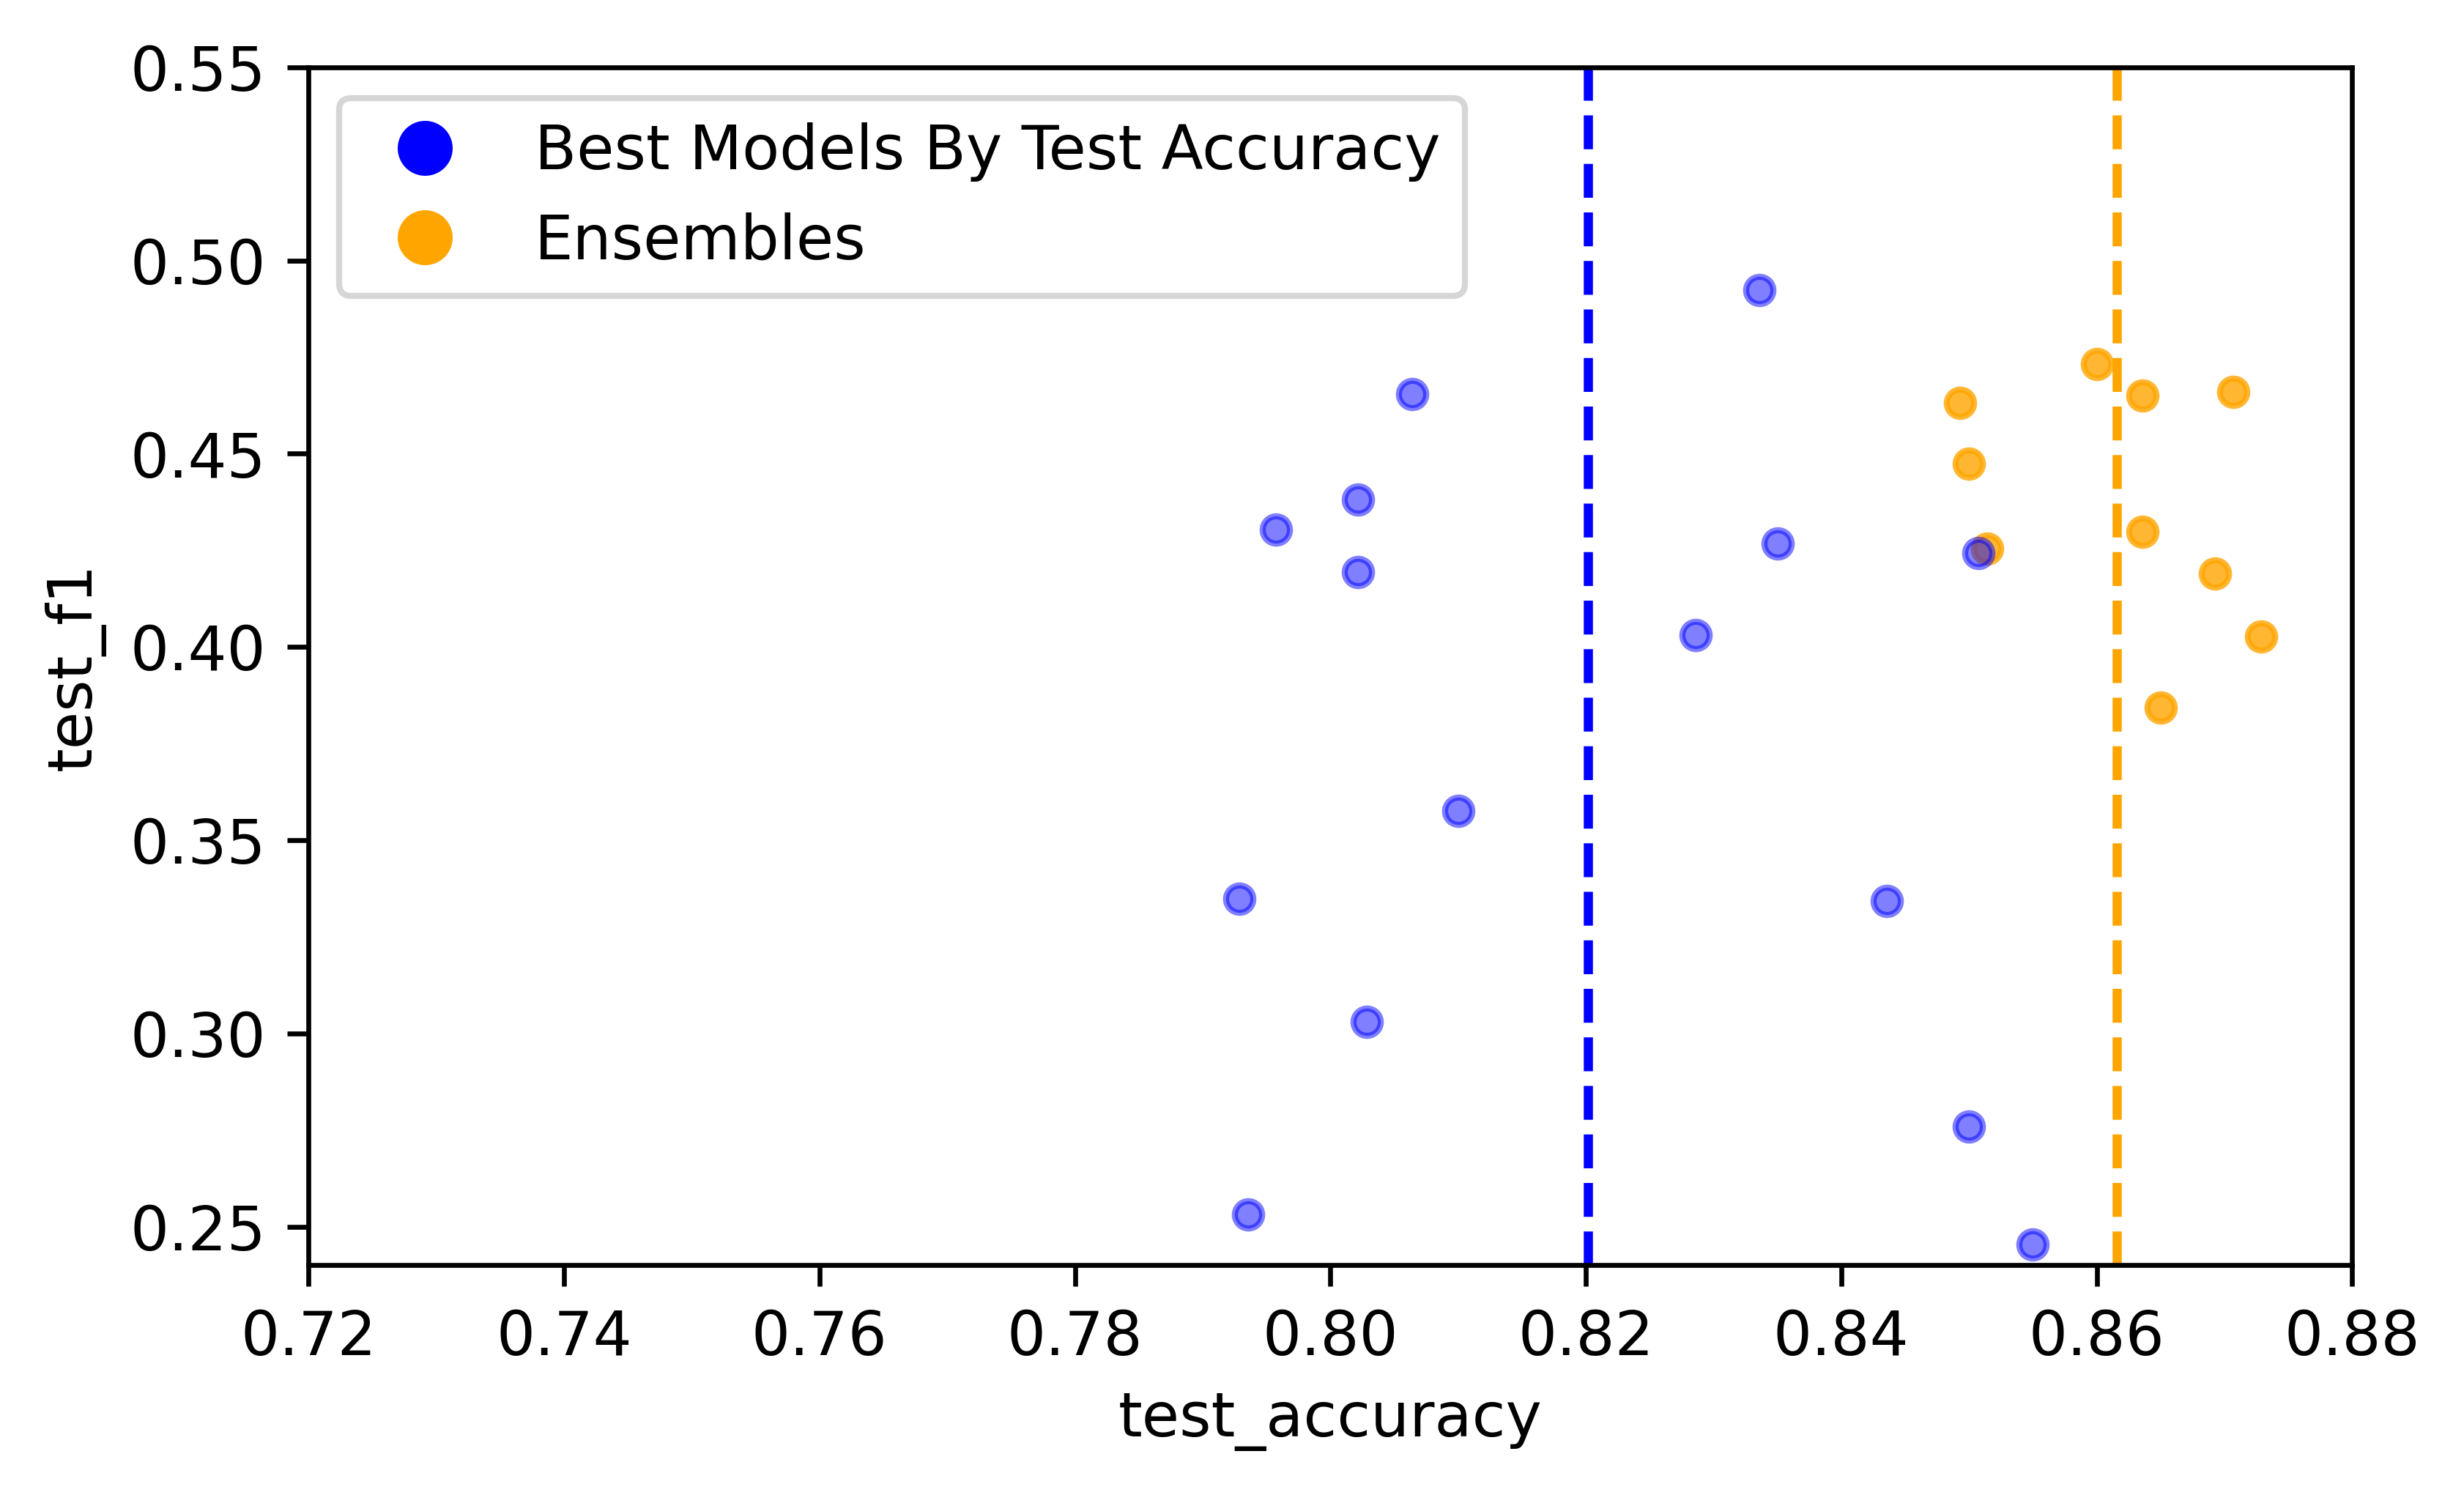

In [44]:
# BEST MODELS BY F1 SCORE, AGAINST ENSMBELS OF SAID MODELS

# plt.scatter(results_df["accuracies"], results_df["f1s"])
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


fig, ax = plt.subplots(figsize=(6, 3.54), dpi=600)

results_df.plot.scatter(x='accuracies', y='f1s', edgecolor='orange', c='orange', alpha=.8, ax=ax)
acc_estimators_df.plot.scatter(x='test_accuracy', y='test_f1', edgecolor='blue', c='blue', alpha=.5, ax=ax)



legend_elements = [Line2D([0], [0], marker='o', color='w', label='Best Models By Test Accuracy',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Ensembles',
                          markerfacecolor='orange', markersize=10)]


ax.legend(handles=legend_elements, loc='upper left')

plt.axvline(x = results_df['accuracies'].mean(), color = 'orange', linestyle = 'dashed')
plt.axvline(x = acc_estimators_df['test_accuracy'].mean(), color = 'blue', linestyle = 'dashed')



plt.ylim(0.24, 0.55)
plt.xlim(0.72, 0.88)


plt.show()

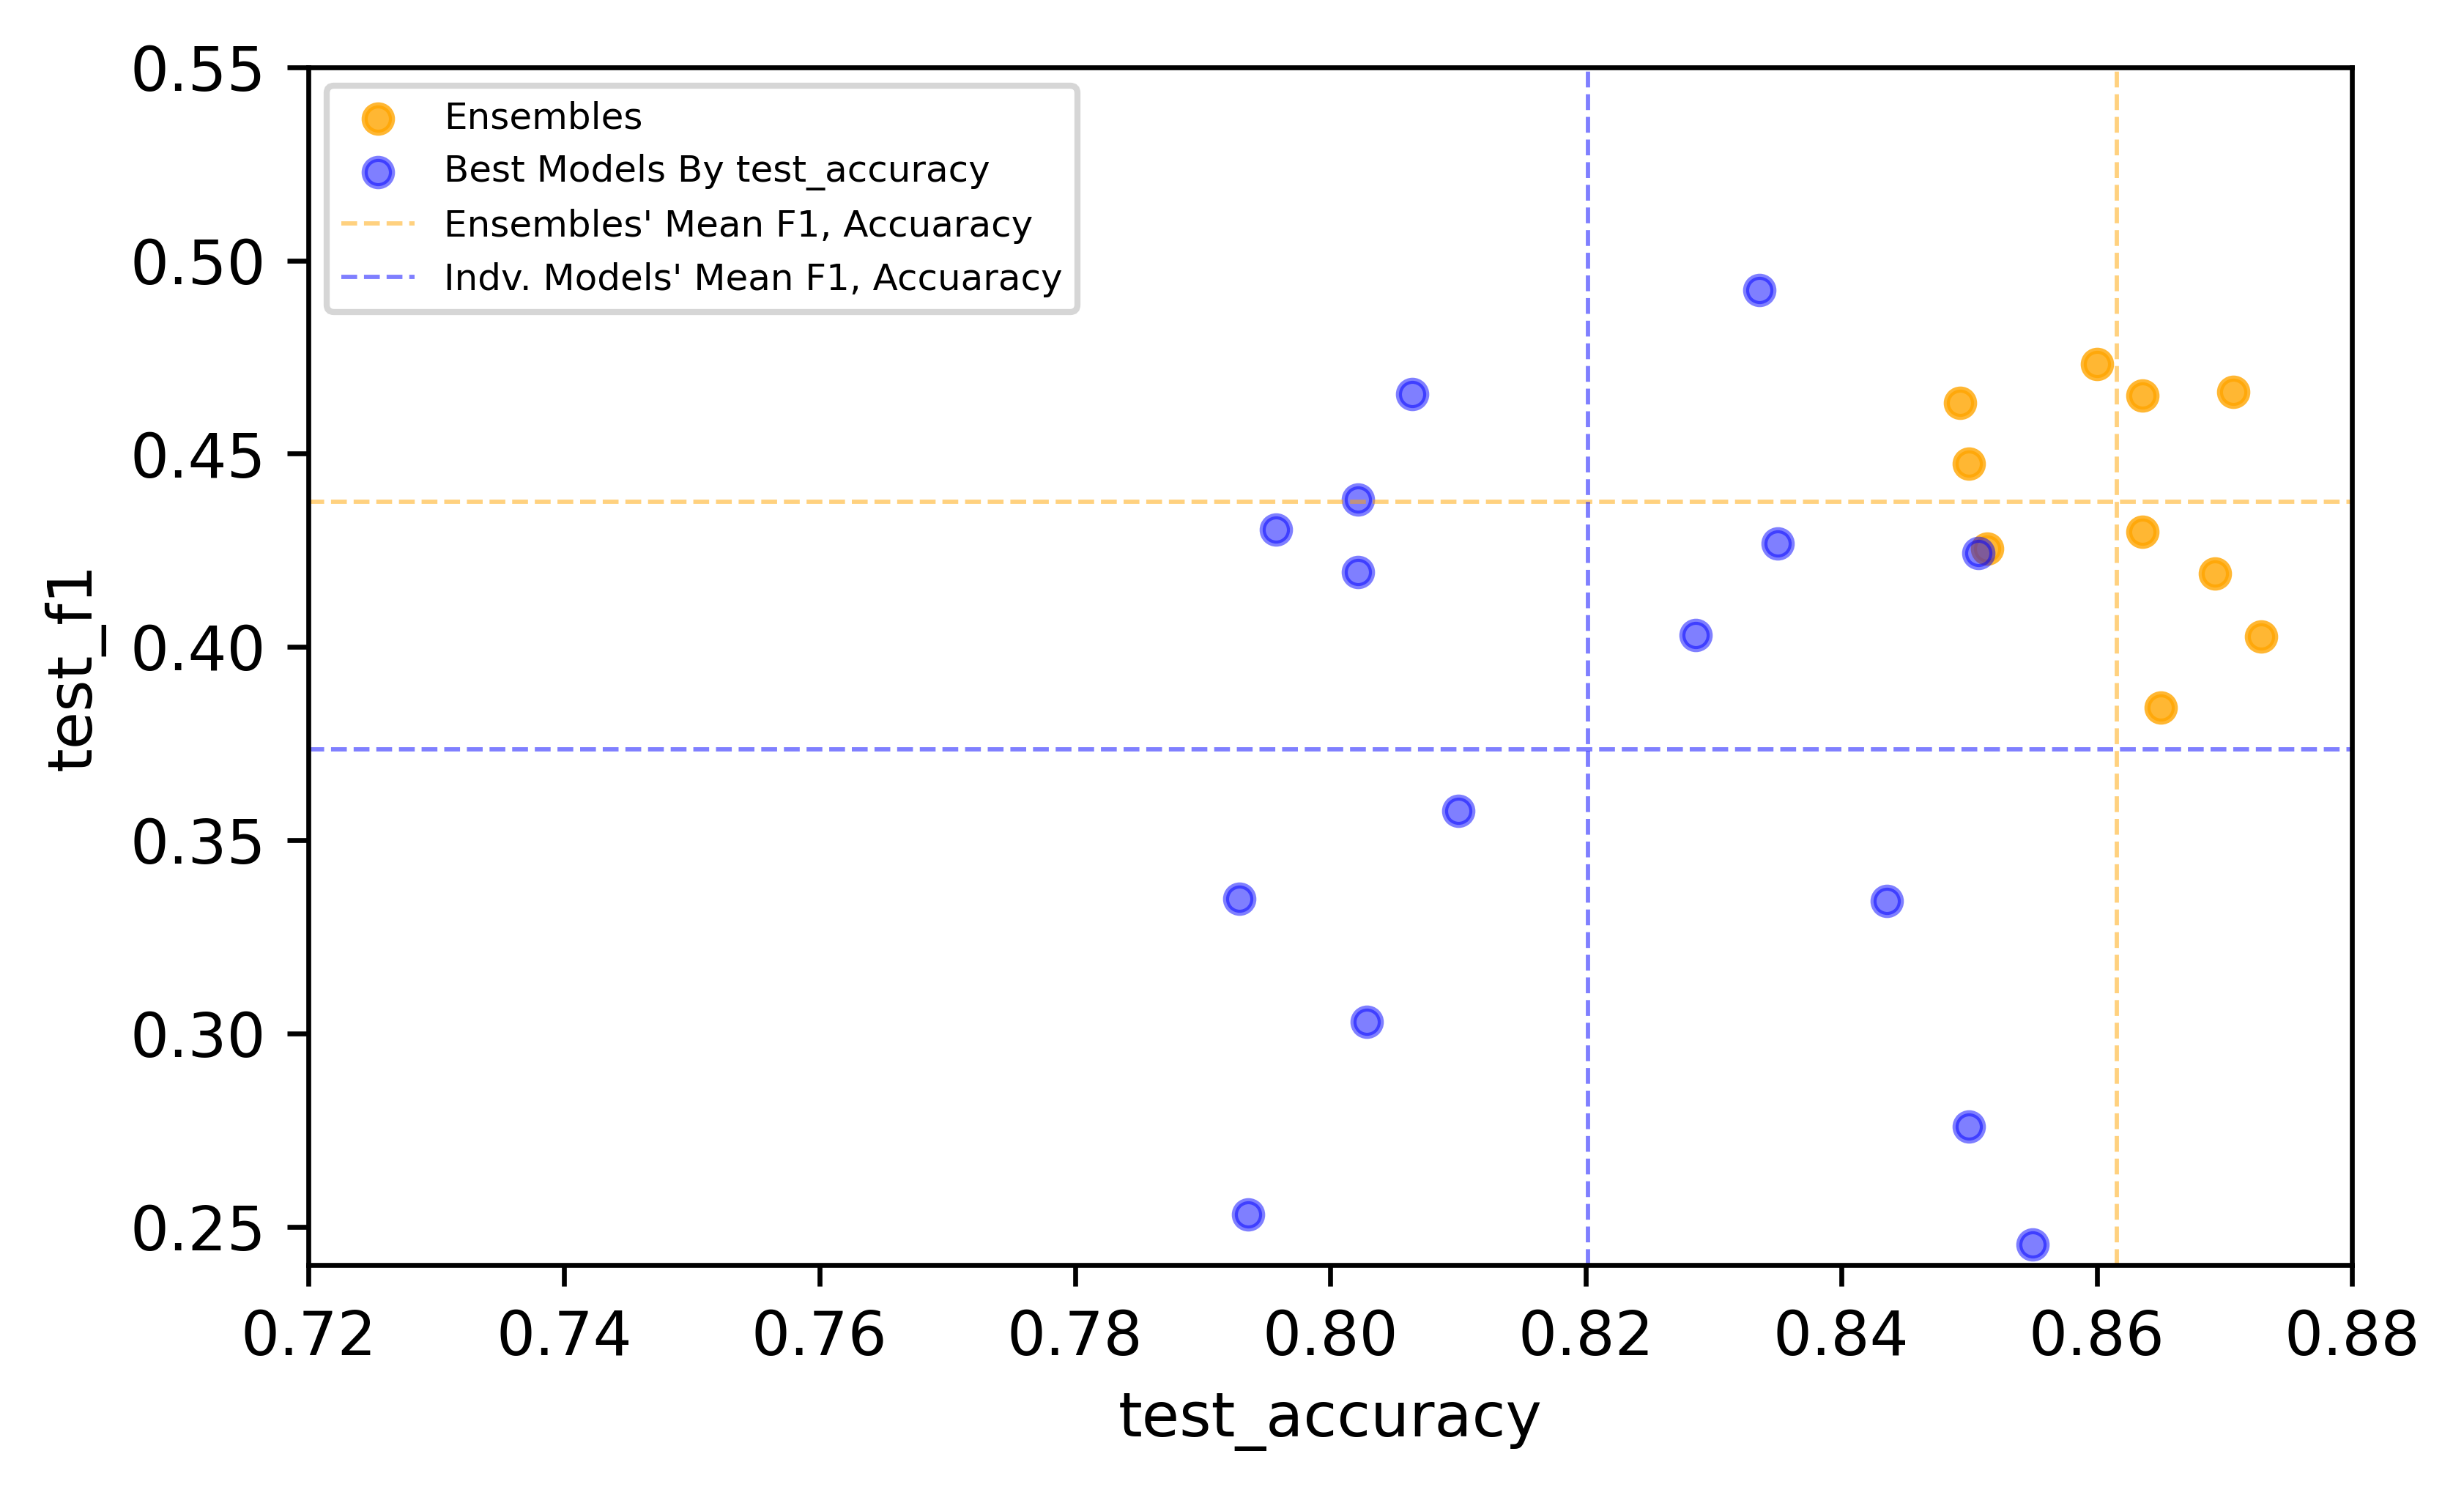

In [48]:
fig, ax = plt.subplots(figsize=(6, 3.54), dpi=600)
# fig, ax = plt.subplots(figsize=(6, 3.54), dpi=600)

results_df.plot.scatter(x='accuracies', y='f1s', edgecolor='orange', c='orange', alpha=.8, label='Ensembles', ax=ax)
acc_estimators_df.plot.scatter(x='test_accuracy', y='test_f1', edgecolor='blue', c='blue', alpha=.5, label='Best Models By test_accuracy', ax=ax)

plt.axhline(y = results_df['f1s'].mean(), color = 'orange', linestyle = 'dashed', alpha=.5, linewidth=.7, label="Ensembles' Mean F1, Accuaracy")
plt.axhline(y = acc_estimators_df['test_f1'].mean(), color = 'blue', linestyle = 'dashed', alpha=.5, linewidth=.7, label="Indv. Models' Mean F1, Accuaracy")

plt.axvline(x = results_df['accuracies'].mean(), color = 'orange', linestyle = 'dashed', alpha=.5, linewidth=.7)
plt.axvline(x = acc_estimators_df['test_accuracy'].mean(), color = 'blue', linestyle = 'dashed', alpha=.5, linewidth=.7)

plt.ylim(0.24, 0.55)
plt.xlim(0.72, 0.88)

plt.legend(loc='upper left', fontsize=6)

plt.show()